<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/Simple_Multivariable_Linear_Regression__xid_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ordinary Least Squares
This Notebook illustrates an implementation of a simple linear regression problem using the normal equation (i.e., finding an analytical solution in the least-squares sense to a multivariable (multiple regressors, scalar prediction) regression setting)


#### Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

#### Data and variables
This example shows how to regress (predict) systolic blood pressure values (output) from age in years and weight in pounds (input)

In [2]:
# X1 = systolic blood pressure; X2 = age in years, X3 = weight in pounds
blood_pressure_data = np.array([
    [132, 52, 173],
    [143, 59, 184],
    [153, 67, 194],
    [162, 73, 211],
    [154, 64, 196],
    [168, 74, 220],
    [137, 54, 188],
    [149, 61, 188],
    [159, 65, 207],
    [128, 46, 167],
    [166, 72, 217]
])
m = blood_pressure_data.shape[0]

# setup X matrix from input data (second and third column - first column is replaced with 1s)
X = np.matrix(np.column_stack((np.ones(m), blood_pressure_data[:, 1:3])))
print('X: \n')
print(X)

X: 

[[  1.  52. 173.]
 [  1.  59. 184.]
 [  1.  67. 194.]
 [  1.  73. 211.]
 [  1.  64. 196.]
 [  1.  74. 220.]
 [  1.  54. 188.]
 [  1.  61. 188.]
 [  1.  65. 207.]
 [  1.  46. 167.]
 [  1.  72. 217.]]


In [3]:
# Now setup vector holding 'labels' (ground-truth data for systolic blood pressure) from input (first column)
y = np.matrix(blood_pressure_data[:, 0]).T
print('y: \n')
print(y)

y: 

[[132]
 [143]
 [153]
 [162]
 [154]
 [168]
 [137]
 [149]
 [159]
 [128]
 [166]]


#### compute regression coefficients

In [4]:
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


#### Plotting and visualization

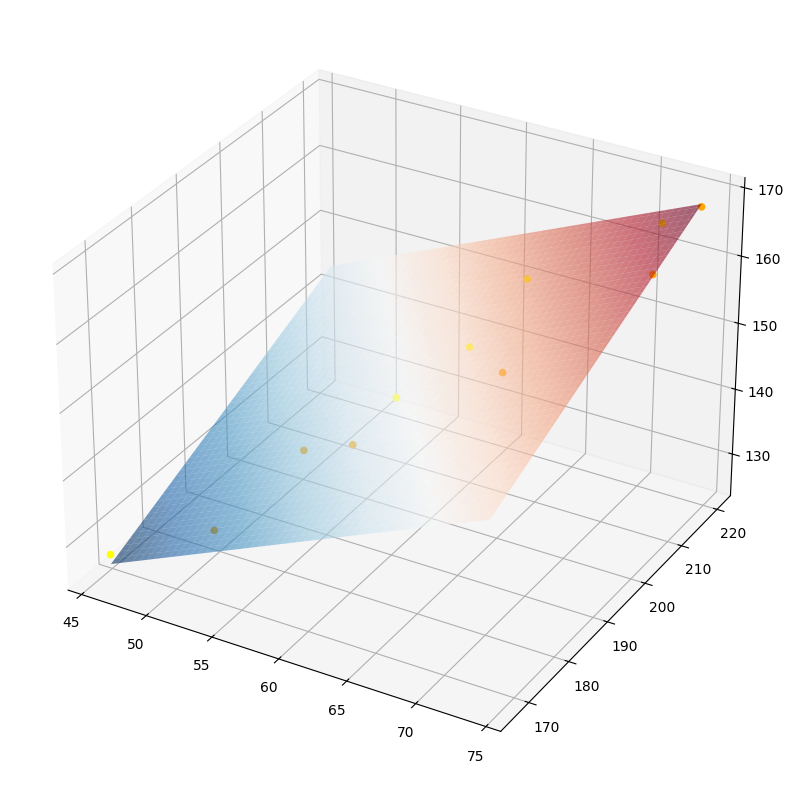

In [5]:
# Create 3D plot
xx1, xx2 = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100), np.linspace(X[:, 2].min(), X[:, 2].max(), 100))

# plot hyperplane
Z = betaHat.item(0) + betaHat.item(1) * xx1 + betaHat.item(2) * xx2

# create 3D Axis for plot
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(projection='3d')

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# residuals
resid = y - np.matmul(X, betaHat)
#print('residuals y - X*betaHat: \n')
#print(resid)

X2 = np.asarray(X[:, 1])
X3 = np.asarray(X[:, 2])
y_arr = np.asarray(y)

ax.scatter(X2[resid >= 0], X3[resid >= 0], y_arr[resid >= 0], c='yellow', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0], X3[resid < 0], y_arr[resid < 0], c='orange', alpha=1.0)

plt.show()

In [6]:
X.shape

(11, 3)

In [7]:
# Cálculo de la función de coste.
def computeCost(x, y, theta):
    """
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

In [18]:
import math
def gradientDescent(x, theta, max_iter,epsilon = 10e-5):
    """

    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
        max_iter:max number of iterations in the algorithm
        epsilon: diference between two sucesive J (cost values)
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
        i: iteration at which convergence is obtained

    """
    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))

        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)

In [85]:
# Número de variables.
n = np.shape(X)[1]-1
theta = np.matrix(np.zeros((n+1, 1)))
X.shape, y.shape, theta.shape


((11, 3), (11, 1), (3, 1))

In [86]:
len(theta.flat)

3

In [87]:
iterations = 150000
alpha = 0.00001
epsilon = 10e-6

In [88]:
theta

matrix([[0.],
        [0.],
        [0.]])

In [89]:
computeCost(X, y, theta)

11348.045454545454

In [90]:
m=len(X)

In [91]:
theta, J_vals, iter= gradientDescent(X, theta, iterations,epsilon)

Convergencia Alcanzada ! 6723  iteraciones


In [92]:
iter

6723

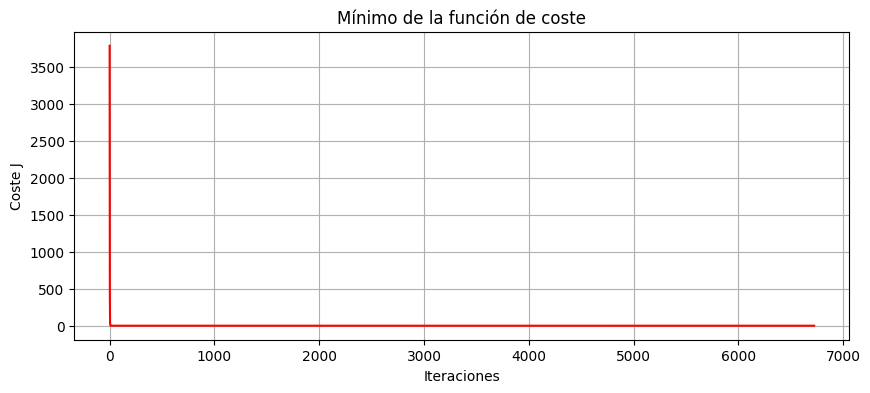

In [93]:
plt.figure(figsize=(10, 4))
plt.xlabel('Iteraciones')
plt.ylabel('Coste J')
plt.title('Mínimo de la función de coste')
plt.grid()
ejex = np.arange(iter+1)
plt.plot(ejex, J_vals, 'r')

In [94]:
theta

matrix([[0.00869384],
        [0.33409498],
        [0.66219262]])

In [95]:
computeCost(X, y, theta)

3.631476783108292

In [96]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [99]:
X_train, X_test, y_train, y_test = train_test_split( X[:,1:3], y, train_size = 0.7, test_size = 0.3, random_state = 0 )

In [100]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(7, 2)
(4, 2)
(7, 1)
(4, 1)


In [114]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [115]:
lr=LinearRegression().fit(X_train,y_train)

In [116]:
print(lr.intercept_)

[29.58493103]


In [117]:
print(lr.coef_)

[[0.95479698 0.3097771 ]]


In [111]:
import pandas as pd

In [120]:
y_pred = lr.predict(np.asarray(X_test))

In [125]:
y_pred.T


array([151.40824955, 125.23836801, 153.65308628, 165.55194451])

In [123]:
y_test

array([[154],
       [128],
       [153],
       [166]])